$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 0** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability, Ipython Primer**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Mikael** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/3** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Sandra Viknander, 9003012482, danvik@student.chalmers.se ; Kevin Jaquier, 921119T334, jaquier@student.chalmer.se** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments except for Neural Network assignment which is be based on matlab. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://research.google.com/colaboratory/faq.html 
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# Theoretical problems

## [Bayes Rule, 5 points]

After your yearly checkup, the doctor has bad news and good news. The
bad news is that you tested positive for a very serious cancer and
that the test is 99% accurate i.e. the probability of testing
positive given you have the disease is 0.99. The probability of
testing negative if you don’t have the disease is the same. The good news is that it is a very rare condition affecting only 1 in 10,000 people. What is the probability you actually have the disease? (Show all calculations and the final result.)

## [Correlation and Independence, 5 points]

Let $X$ be a continuous variable, uniformly distributed in $[-1, +1]$ and let $Y := X^2$. Clearly $Y$ is not independent of $X$ -- in fact it is uniquely determined by $X$. However, show that $\mbox{cov}(X, Y ) = 0$.

## [Setting hyperparameters, 3 points]

Suppose $\theta \sim \mbox{Beta}(a,b)$ and we believe $E[\theta] = m$
and $\mbox{var}(\theta) = v$. How should the parameters $a$ and $b$ be
set to be consistent with this? Confirm that this gives the same values claimed in the lecture.

In [ ]:
# See report

# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

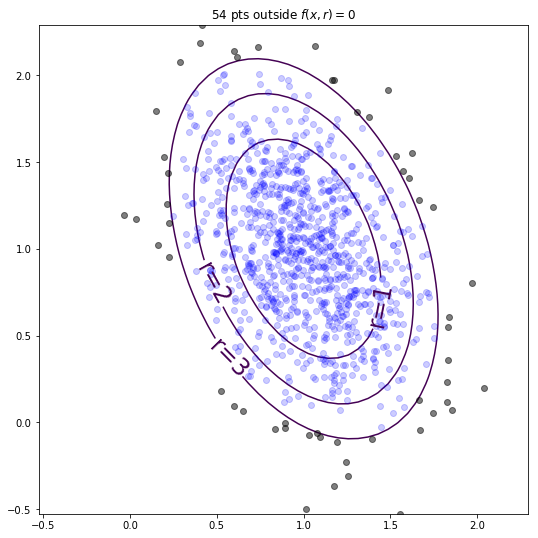

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

def f(x, r, mu, cov):
    delta = x - mu     # DxN
    delta_T = delta.T   # NxD
    cov_inv = inv(cov)  # DxD
    y = (delta_T @ cov_inv @ delta)/2 - r
    
    return y


N = 1000  # nb samples
RES = 50  # resolution of contour plot
R_VALUES = [1,2,3]
mu = np.array([1, 1])
cov = np.array([[0.1, -0.05], [-0.05, 0.2]])
x = np.random.multivariate_normal(mu, cov, N)  # samples

# Plot data
x_range = np.linspace(x.min(), x.max(), RES)
x_span = (x.min(), x.max())
X0, X1 = np.meshgrid(x_range, x_range)
x_space = np.stack([X0, X1], axis=2)
ys = {
    r: np.array([f(x[i,:], r, mu, cov) for i in range(N)])
    for r in R_VALUES
}

# Scatter plot
is_inside = ys[3] > 0
outside = x[is_inside]
inside = x[~is_inside]
outside_count = outside.shape[0]
plt.plot(inside[:,0], inside[:,1], 'o', color='blue', alpha=.2)
plt.plot(outside[:,0], outside[:,1], 'o', color='black', alpha=.5)

# Contour plot
for r in R_VALUES:
    Y = np.array([f(x_space[i,j,:], r, mu, cov) for i, j in product(range(RES), range(RES))])
    Y = Y.reshape(RES, RES)
    cp = plt.contour(X0, X1, Y, levels=[0])
    plt.clabel(cp, inline=1, fontsize=24, fmt={0:f"r={r}"})
    
plt.title(f"{outside_count} pts outside $f(x,r)=0$")
plt.axis('image')  # set axis so that all samples are visible
plt.show()

We can clearly see on the scatter plot the ellipsis shape of the multivariate normal distribution. $f(x,r)$ gives a quadratic function in the vector $x$, which can be used to approximate this shape. Using different values of $r$ let us tune this approximation to include more or less samples. $r=3$ seem to include most samples and exclude the outliers, in a way similar to putting a threshold on $3\sigma$ in a one-dimensional normal distribution.

## [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

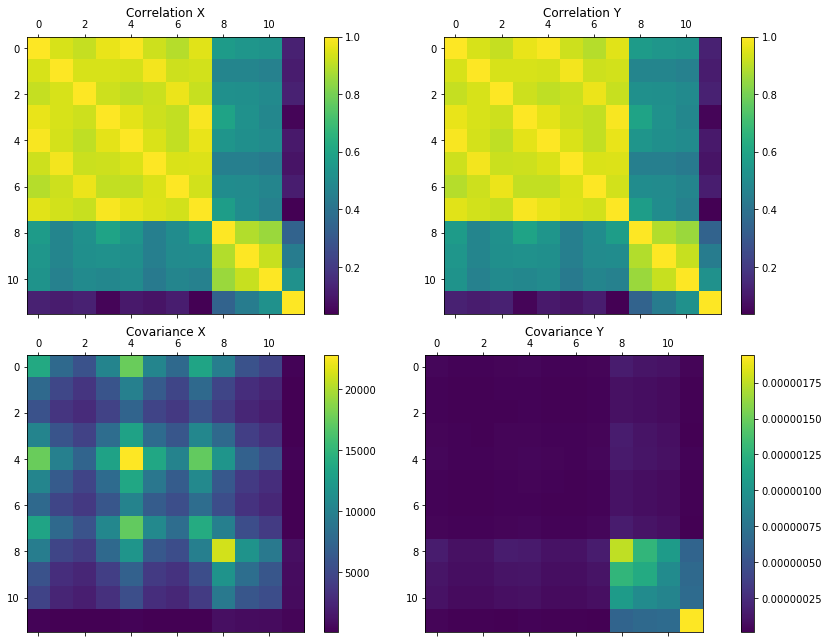

In [106]:
data = np.loadtxt("./dataset0.txt")
x = data.T
x_cov = np.cov(x)
x_corr = np.corrcoef(x)
x_sum = x.sum(axis=1, keepdims=True)
y = x / x_sum
y_cov = np.cov(y)
y_corr = np.corrcoef(y)

# Plot data
plots = [
    ('Correlation X', x_corr, (0, 0)),
    ('Correlation Y', y_corr, (0, 1)),
    ('Covariance X', x_cov, (1, 0)),
    ('Covariance Y', y_cov, (1, 1)),
]

# Plots
plt.rcParams["figure.figsize"] = (12,9)
fig, axes = plt.subplots(2, 2)
for title, mat, cell in plots:
    im = axes[cell].matshow(mat, interpolation="nearest")
    axes[cell].set_title(title)
    fig.colorbar(im, ax=axes[cell])

plt.axis('scaled')
plt.tight_layout()
plt.show()


As we can see, rescaling the data doesn't change the correlation but changes the covariance. This is expected since correlation does not depend on the relative scales but covariance does. Hence the covariance shown for X does not make sense because features are not on the same scale ; in other words, we are comparing oranges and apples. We can see that after scaling, covariance disappear for most features except the last 4 which do show slight covariances.

What the plots show is that features 1-8 are both highly correlated and have no covariance. This suggest they are redundant.